In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [2]:
df = pd.read_csv('diamonds.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

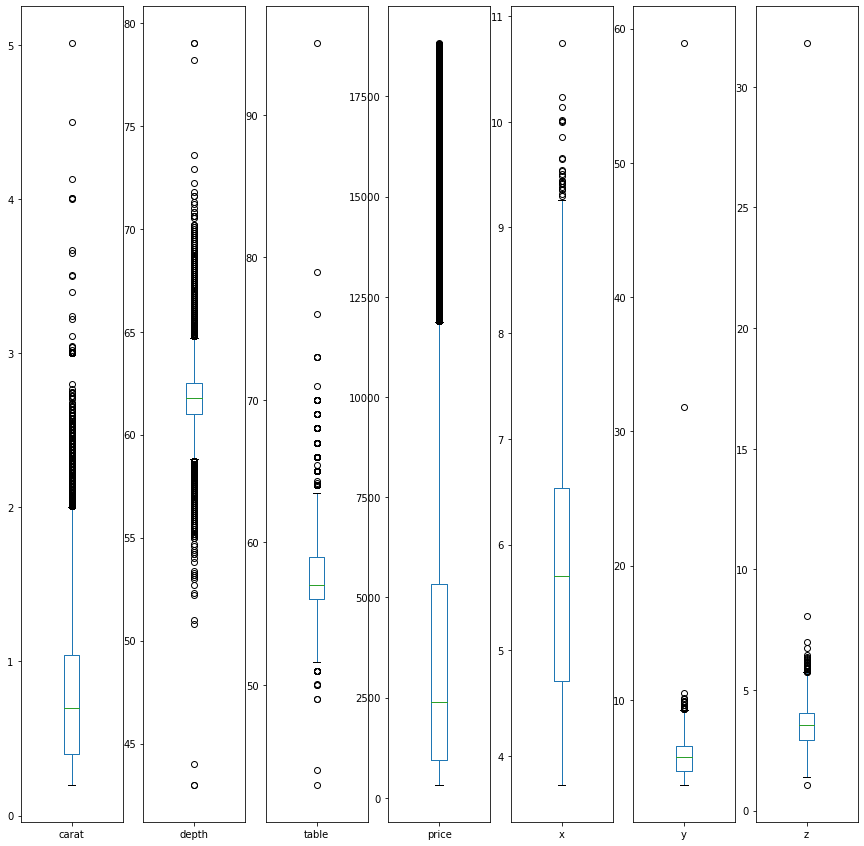

In [6]:
df.plot(kind='box',figsize=(15,15),subplots=True)
plt.show()

In [7]:
def outliers(var):
    a = []
    q1 = df[var].quantile(.25)
    q2 = df[var].quantile(.5)
    q3 = df[var].quantile(.75)
    iqr = q3-q1
    ulim = float(q3+(1.5*iqr))
    llim = float(q1-(1.5*iqr))

    for i in df[var]:
        if i > ulim:
            i=np.NaN
        elif i < llim:
            i = np.NaN
        else:
            i=i
        a.append(i)
    return a

for col in df.select_dtypes(exclude='object').columns:
    df[col] = outliers(col)

In [8]:
df.isna().sum()

carat      1883
cut           0
color         0
clarity       0
depth      2543
table       604
price      3532
x            24
y            22
z            29
dtype: int64

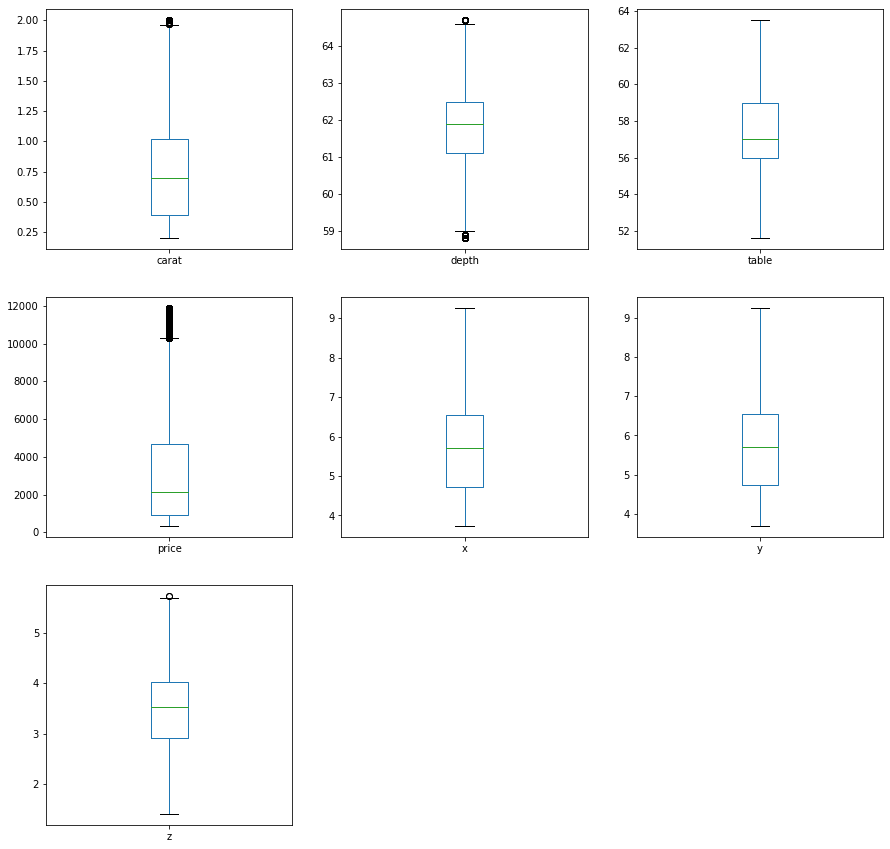

In [9]:
df.plot(kind='box',figsize=(15,15),subplots=True,layout=(3,3))
plt.show()

In [10]:
df.describe()

,carat,depth,table,price,x,y,z
count,52037.000000,51377.000000,53316.000000,50388.000000,53896.000000,53898.000000,53891.000000
mean,0.748646,61.776344,57.373199,3159.275462,5.729881,5.731969,3.538265
std,0.402094,1.116448,2.074207,2764.924572,1.116584,1.108904,0.689473
min,0.200000,58.800000,51.600000,326.000000,3.730000,3.680000,1.410000
25%,0.390000,61.100000,56.000000,911.000000,4.710000,4.720000,2.910000
50%,0.700000,61.900000,57.000000,2154.000000,5.700000,5.710000,3.530000
75%,1.020000,62.500000,59.000000,4668.250000,6.540000,6.540000,4.030000
max,2.000000,64.700000,63.500000,11883.000000,9.260000,9.260000,5.730000


In [11]:
for i in df.select_dtypes(exclude='object').columns:
    df[i]=df[i].fillna(df[i].mean())

In [12]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [13]:
df_cat = df.select_dtypes(include='object')
df_cat['cut'].value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

In [14]:
df_cat['color'].value_counts()

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

In [15]:
df_cat['clarity'].value_counts()

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)
df_cat

,cut,color,clarity
0,2,1,3
1,3,1,2
2,1,1,4
3,3,5,5
4,1,6,3
...,...,...,...
53935,2,0,2
53936,1,0,2
53937,4,0,2
53938,3,4,3


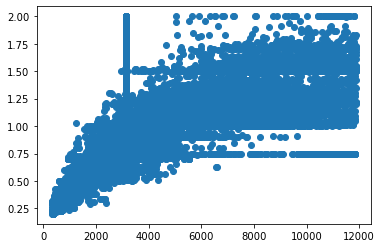

In [18]:
plt.scatter(df['price'],df['carat'])

In [19]:
label_encoder_data = df.copy()

le = LabelEncoder()
for col in ['cut','color','clarity']:
    label_encoder_data[col] = le.fit_transform(label_encoder_data[col])

<AxesSubplot:>

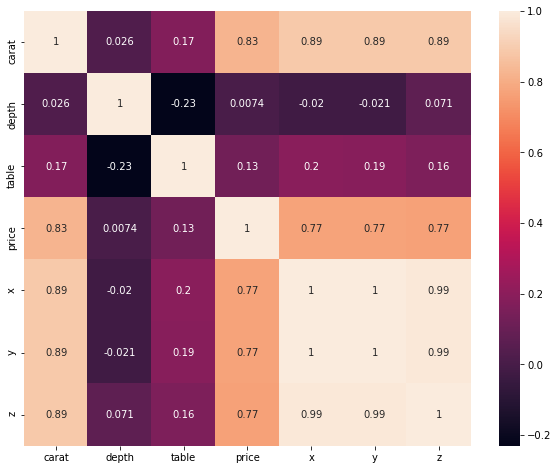

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [21]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.025643,0.174045,0.825053,0.889231,0.888557,0.888951
depth,0.025643,1.000000,-0.230269,0.007363,-0.019746,-0.021396,0.071118
table,0.174045,-0.230269,1.000000,0.129533,0.195293,0.190757,0.160571
price,0.825053,0.007363,0.129533,1.000000,0.771449,0.772413,0.768677
x,0.889231,-0.019746,0.195293,0.771449,1.000000,0.998244,0.989312
y,0.888557,-0.021396,0.190757,0.772413,0.998244,1.000000,0.989400
z,0.888951,0.071118,0.160571,0.768677,0.989312,0.989400,1.000000


In [22]:
df["size"] = df["x"] * df["y"] * df["z"]
print(df)

       carat        cut color clarity      depth      table   price     x  \
0       0.23      Ideal     E     SI2  61.500000  55.000000   326.0  3.95   
1       0.21    Premium     E     SI1  59.800000  61.000000   326.0  3.89   
2       0.23       Good     E     VS1  61.776344  57.373199   327.0  4.05   
3       0.29    Premium     I     VS2  62.400000  58.000000   334.0  4.20   
4       0.31       Good     J     SI2  63.300000  58.000000   335.0  4.34   
...      ...        ...   ...     ...        ...        ...     ...   ...   
53935   0.72      Ideal     D     SI1  60.800000  57.000000  2757.0  5.75   
53936   0.72       Good     D     SI1  63.100000  55.000000  2757.0  5.69   
53937   0.70  Very Good     D     SI1  62.800000  60.000000  2757.0  5.66   
53938   0.86    Premium     H     SI2  61.000000  58.000000  2757.0  6.15   
53939   0.75      Ideal     D     SI2  62.200000  55.000000  2757.0  5.83   

          y     z        size  
0      3.98  2.43   38.202030  
1      3.84

In [23]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25,shuffle = True ,random_state = 404)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40440, 10), (13480, 10), (40440,), (13480,))

In [25]:
X_train

array([[0.92, 'Ideal', 'F', ..., 6.19, 3.87, 149.720625],
       [0.7486457712780686, 'Very Good', 'J', ..., 8.2, 5.02,
        335.89823999999993],
       [1.2, 'Very Good', 'H', ..., 7.02, 4.11, 200.23426800000001],
       ...,
       [1.06, 'Ideal', 'F', ..., 6.51, 4.05, 172.16671499999998],
       [1.0, 'Ideal', 'J', ..., 6.5, 3.84, 161.4912],
       [1.15, 'Ideal', 'H', ..., 6.8, 4.13, 191.81372000000002]],
      dtype=object)

In [26]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error,r2_score

LinearRegressionModel = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
SGDRegressionModel = SGDRegressor(alpha=0.1,random_state=33,penalty='l2',loss = 'huber')
LassoRegressionModel = Lasso(alpha=1.0,random_state=33,normalize=False)
RidgeRegressionModel = Ridge(alpha=1.0,random_state=33)
RandomForestRegressorModel = RandomForestRegressor(n_estimators=1000,max_depth=8, random_state=33)
GBRModel = GradientBoostingRegressor(n_estimators=500,max_depth=7,learning_rate = 1.5 ,random_state=33)
SVRModel = SVR(C = 1.0 ,epsilon=0.1,kernel = 'rbf') 
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=3,random_state=33)
KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 5, weights='uniform',algorithm = 'auto')    


Models = [LinearRegressionModel,SGDRegressionModel,LassoRegressionModel,RidgeRegressionModel,RandomForestRegressorModel,
          GBRModel,SVRModel,DecisionTreeRegressorModel,KNeighborsRegressorModel]

In [ ]:
for Model in Models[:1] : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train)
    print(f'MAE value is  : {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE value is  : {mean_squared_error(y_test, y_pred)}')
    print(f'MdSE value is  : {median_absolute_error(y_test, y_pred)}')
    print(f'R2 value is  : {r2_score(y_test, y_pred, multioutput="variance_weighted")}')